In [1]:
import importlib
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

sys.path.insert(0, '../src')
import dataset

importlib.reload(dataset)
# Import your dataset classes
from dataset import COCOSegmentationDataset, RORDInpaintingDataset

In [4]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Define parameters
coco_root_dir = '/media/tiagociiic/easystore/COCO_dataset'
rord_root_dir = '/media/tiagociiic/easystore/RORD_dataset'
image_size = (256, 256)
mask_size = (256, 256)
batch_size = 4

# Create datasets
coco_dataset = COCOSegmentationDataset(
    root_dir=coco_root_dir,
    split='train',
    year='2017',
    image_size=image_size,
    mask_size=mask_size,
    selected_class_ids=[1, 2, 3]  # Example: person, bicycle, car
)

rord_dataset = RORDInpaintingDataset(
    root_dir=rord_root_dir,
    split='train',
    image_size=image_size,
    transform=transforms.Compose([
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
)

# Create dataloaders
coco_loader = DataLoader(coco_dataset, batch_size=batch_size, shuffle=True)
rord_loader = DataLoader(rord_dataset, batch_size=batch_size, shuffle=True)


def visualize_batch(batch, dataset_name):
    """Visualize a batch of data"""
    if dataset_name == 'COCO':
        images, masks = batch['image'], batch['mask']
        fig, axes = plt.subplots(batch_size, 2, figsize=(10, 5 * batch_size))
        for i in range(batch_size):
            # Denormalize and convert to numpy for visualization
            img = images[i].permute(1, 2, 0).numpy()
            img = (img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])).clip(0, 1)

            axes[i, 0].imshow(img)
            axes[i, 0].set_title(f'Image {i + 1}')
            axes[i, 0].axis('off')

            mask = masks[i].sum(dim=0).numpy()  # Combine all class masks
            axes[i, 1].imshow(mask, cmap='gray')
            axes[i, 1].set_title(f'Mask {i + 1}')
            axes[i, 1].axis('off')
    elif dataset_name == 'RORD':
        images, gt_images, masks = batch['image'], batch['gt'], batch['mask']
        fig, axes = plt.subplots(batch_size, 3, figsize=(15, 5 * batch_size))
        for i in range(batch_size):
            # Denormalize and convert to numpy for visualization
            img = images[i].permute(1, 2, 0).numpy()
            img = (img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])).clip(0, 1)

            gt_img = gt_images[i].permute(1, 2, 0).numpy()
            gt_img = (gt_img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])).clip(0, 1)

            axes[i, 0].imshow(img)
            axes[i, 0].set_title(f'Image {i + 1}')
            axes[i, 0].axis('off')

            axes[i, 1].imshow(gt_img)
            axes[i, 1].set_title(f'Ground Truth {i + 1}')
            axes[i, 1].axis('off')

            axes[i, 2].imshow(masks[i].squeeze().numpy(), cmap='gray')
            axes[i, 2].set_title(f'Mask {i + 1}')
            axes[i, 2].axis('off')

    plt.tight_layout()
    plt.show()


def check_data_range(batch, dataset_name):
    """Check the range of values in the data"""
    if dataset_name == 'COCO':
        images, masks = batch['image'], batch['mask']
        print(f"COCO - Image range: [{images.min():.2f}, {images.max():.2f}]")
        print(f"COCO - Mask range: [{masks.min():.2f}, {masks.max():.2f}]")
        print(f"COCO - Unique mask values: {torch.unique(masks)}")
    elif dataset_name == 'RORD':
        images, gt_images, masks = batch['image'], batch['gt'], batch['mask']
        print(f"RORD - Image range: [{images.min():.2f}, {images.max():.2f}]")
        print(f"RORD - Ground Truth range: [{gt_images.min():.2f}, {gt_images.max():.2f}]")
        print(f"RORD - Mask range: [{masks.min():.2f}, {masks.max():.2f}]")
        print(f"RORD - Unique mask values: {torch.unique(masks)}")


loading annotations into memory...
Done (t=12.01s)
creating index...
index created!


2024-07-19 01:07:28.790 | INFO     | dataset:__init__:104 - Loading image, ground truth, and mask files...
2024-07-19 01:07:28.791 | INFO     | dataset:__init__:109 - Loading image files from: /media/tiagociiic/easystore/RORD_dataset/train/img, ground truth files from: /media/tiagociiic/easystore/RORD_dataset/train/gt, and mask files from: /media/tiagociiic/easystore/RORD_dataset/train/multiclass_mask
2024-07-19 01:07:48.599 | INFO     | dataset:__init__:119 - Found 162204 image files, 412745 ground truth files, and 161164 mask files
2024-07-19 01:07:49.222 | INFO     | dataset:__init__:126 - Found 161164 common files in the directories
2024-07-19 01:07:52.064 | INFO     | dataset:__init__:144 - Found 161078 valid samples out of 161164 total samples


COCO Dataset:
Batch size: 4
Image shape: torch.Size([4, 3, 256, 256])
Mask shape: torch.Size([4, 3, 256, 256])
COCO - Image range: [-2.12, 2.64]
COCO - Mask range: [0.00, 1.00]
COCO - Unique mask values: tensor([0., 1.])


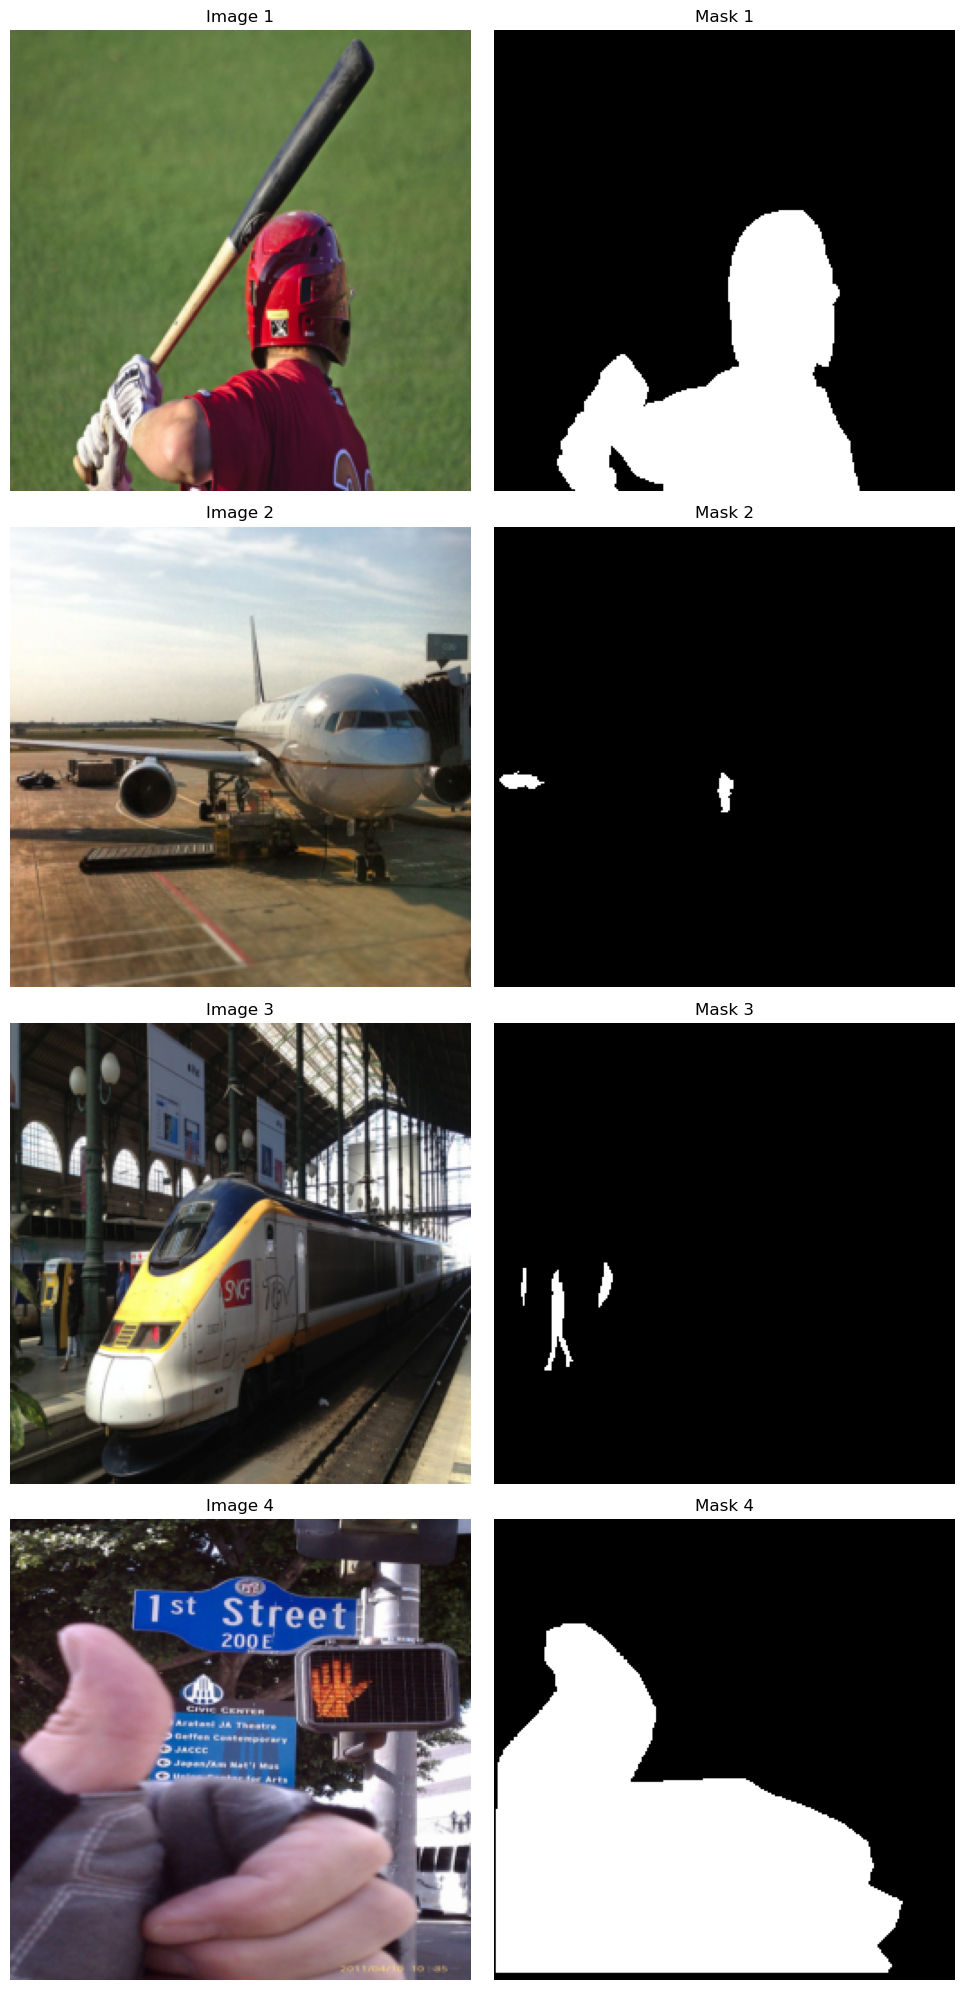

In [7]:
# Test COCO dataset
coco_batch = next(iter(coco_loader))
print("COCO Dataset:")
print(f"Batch size: {coco_batch['image'].shape[0]}")
print(f"Image shape: {coco_batch['image'].shape}")
print(f"Mask shape: {coco_batch['mask'].shape}")
check_data_range(coco_batch, 'COCO')
visualize_batch(coco_batch, 'COCO')


In [ ]:
# Test RORD dataset
rord_batch = next(iter(rord_loader))
print("\nRORD Dataset:")
print(f"Batch size: {rord_batch['image'].shape[0]}")
print(f"Image shape: {rord_batch['image'].shape}")
print(f"Ground Truth shape: {rord_batch['gt'].shape}")
print(f"Mask shape: {rord_batch['mask'].shape}")
check_data_range(rord_batch, 'RORD')
visualize_batch(rord_batch, 'RORD')

In [ ]:
# Additional checks
print("\nAdditional Checks:")
print(f"COCO - Number of classes: {coco_dataset.num_classes}")
print(f"COCO - Class names: {coco_dataset.get_class_names()}")
print(f"RORD - Dataset length: {len(rord_dataset)}")

# Test your loss functions
from losses import SegmentationLoss, DiceLoss

seg_loss = SegmentationLoss(ce_weight=1, dice_weight=0.5)
dice_loss = DiceLoss()

# Assuming 3 classes for this example
dummy_pred = torch.randn(4, 3, 256, 256)
dummy_target = torch.randint(0, 3, (4, 256, 256))

seg_loss_value = seg_loss(dummy_pred, dummy_target)
dice_loss_value = dice_loss(dummy_pred, dummy_target)

print(f"\nDummy Segmentation Loss: {seg_loss_value.item():.4f}")
print(f"Dummy Dice Loss: {dice_loss_value.item():.4f}")
